## tabela de Fourier
Fazemos uma partição do intervalo $[0,2\pi]$ em $N$ partes iguais começando com $x_0=0,$ depois $x_k = \frac{2k\pi}{N}$ até $x_{N-1}$. Para um número natural $L$ consideramos a família de funções $$\{ 1, \cos{x}, \sin{x}, \cos{2x}, \sin{2x}, \cdots, \cos{(L-1)x},\sin{(L-1)x}\}.$$ A função **tabelaFourier** deve produzir a tabela
$$\begin{array}{cccc}
x_0 & x_1& \cdots & x_{N-1} \\ 
1 & 1 & \cdots & 1 \\
\cos{x_0} & \cos{x_1} &\cdots & \cos{x_{N-1}}\\
\vdots    & \vdots   &    &\vdots \\
\sin{(L-1)x_0}&\sin{(L-1)x_1}& \cdots & \sin{(L-1)x_{N-1}}
\end{array}$$

In [6]:
import numpy as np
def tabelaFourier(N,L):
    x=np.array([2*k*np.pi/N for k in range(N)])
    tabela = [x]
    for u in range(L):
        tabela.append(np.array(np.cos(u*x)))
        if not(u == 0):
            tabela.append(np.array(np.sin(u*x)))
    return np.array(tabela)

In [7]:
A=tabelaFourier(3,2)

print(A)


[[ 0.         2.0943951  4.1887902]
 [ 1.         1.         1.       ]
 [ 1.        -0.5       -0.5      ]
 [ 0.         0.8660254 -0.8660254]]


### Qual deve ser a relação entre $N$ e $L$.
A família de funções tem $2L-1$ funções $N$ deve ser então pelo menos $2L-1$. Na classe fizemos o exemplo com $L=3$ e $N=4$. (Que não satisfaz a condição minima)

In [8]:
A1 = tabelaFourier(4,3)
print(A1)


[[  0.00000000e+00   1.57079633e+00   3.14159265e+00   4.71238898e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   6.12323400e-17  -1.00000000e+00  -1.83697020e-16]
 [  0.00000000e+00   1.00000000e+00   1.22464680e-16  -1.00000000e+00]
 [  1.00000000e+00  -1.00000000e+00   1.00000000e+00  -1.00000000e+00]
 [  0.00000000e+00   1.22464680e-16  -2.44929360e-16   3.67394040e-16]]


Note que neste caso a última linha são zeros (aproximados!) e as linhas anteriores formam um sistema ortogonal.Vamos ver com $N=5.$ 

In [9]:
A2 = tabelaFourier(5,3)
print(A2)

[[ 0.          1.25663706  2.51327412  3.76991118  5.02654825]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          0.30901699 -0.80901699 -0.80901699  0.30901699]
 [ 0.          0.95105652  0.58778525 -0.58778525 -0.95105652]
 [ 1.         -0.80901699  0.30901699  0.30901699 -0.80901699]
 [ 0.          0.58778525 -0.95105652  0.95105652 -0.58778525]]


In [13]:
print(A2.T)

[[ 0.          1.          1.          0.          1.          0.        ]
 [ 1.25663706  1.          0.30901699  0.95105652 -0.80901699  0.58778525]
 [ 2.51327412  1.         -0.80901699  0.58778525  0.30901699 -0.95105652]
 [ 3.76991118  1.         -0.80901699 -0.58778525  0.30901699  0.95105652]
 [ 5.02654825  1.          0.30901699 -0.95105652 -0.80901699 -0.58778525]]


In [16]:
D=np.dot(A2,A2.T)
D1=D[1:,1:]
print(D1)

[[  5.00000000e+00  -1.11022302e-16   1.11022302e-16   0.00000000e+00
    3.33066907e-16]
 [ -1.11022302e-16   2.50000000e+00   5.55111512e-17  -2.77555756e-17
    1.66533454e-16]
 [  1.11022302e-16   5.55111512e-17   2.50000000e+00   1.11022302e-16
   -2.22044605e-16]
 [  0.00000000e+00  -2.77555756e-17   1.11022302e-16   2.50000000e+00
    2.77555756e-16]
 [  3.33066907e-16   1.66533454e-16  -2.22044605e-16   2.77555756e-16
    2.50000000e+00]]


Vocês podem dar uma interpretação para a matriz acima?


In [23]:
y = np.array([2,-1,3, 4, 5])
E=np.dot(A2,y.T)
print(E[1:])

[ 13.          -2.42705098  -6.29412435   0.92705098  -2.575655  ]


In [25]:
a = [D1[u,u]/E[u+1] for u in range(5)]
print(a)

[0.38461538461538464, -1.030056647916491, -0.39719583868323477, 2.6967233145831608, -0.97062689003989211]


Agora vamos fazer o gráfico:

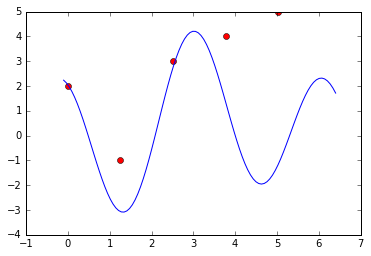

In [30]:
%matplotlib inline
f0= lambda x: 1
f1= lambda x: np.cos(x)
f2= lambda x: np.sin(x)
f3= lambda x: np.cos(2*x)
f4= lambda x: np.sin(2*x)
f = lambda x: a[0]*f0(x)+ a[1]*f1(x) + a[2]*f2(x) + a[3]*f3(x)+a[4]*f4(x)
from matplotlib.pyplot import plot
t=np.linspace(-0.1,6.4,100)
x=A2[0,:]
plot(x,y,"ro", t,f(t))